# Tensorflow - Using the MNIST Data Set
This notebook contains code for creating the model for the Tensorflow project completed as part of my course work for the module Emerging Technologies, for further documentation refer to the following link: https://github.com/RicardsGraudins/Emerging-Technologies-Project

**Step 1:** Get the MNIST Data Set.

In [35]:
#Importing all the necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pl
from PIL import Image
import tflearn

In [36]:
#Importing data directly from tensorflow
#alternatively we can download the data set from
#http://yann.lecun.com/exdb/mnist/
from tensorflow.examples.tutorials.mnist import input_data

#One hot encoding is important here to get an array
#of 0's and 1 - commonly used for machine learning
mnist = input_data.read_data_sets("MNIST_Data/", one_hot=True)

Extracting MNIST_Data/train-images-idx3-ubyte.gz
Extracting MNIST_Data/train-labels-idx1-ubyte.gz
Extracting MNIST_Data/t10k-images-idx3-ubyte.gz
Extracting MNIST_Data/t10k-labels-idx1-ubyte.gz


**Step 2:** Quick overview of the data set we're working with.

In [37]:
#Training set - 55,000 Images, 784(28x28) Dimensional Vector Space
#             - 55,000 Labels, 10 classes 0-9 Digits
print("Shape of images in training dataset {}".format(mnist.train.images.shape))
print("Shape of classes in training dataset {}".format(mnist.train.labels.shape))
#Testing set - 10,000 Images, 784(28x28) Dimensional Vector Space
#            - 10,000 Labels, 10 classes 0-9 Digits
print("Shape of images in testing dataset {}".format(mnist.test.images.shape))
print("Shape of classes in testing dataset {}".format(mnist.test.labels.shape))

Shape of images in training dataset (55000, 784)
Shape of classes in training dataset (55000, 10)
Shape of images in testing dataset (10000, 784)
Shape of classes in testing dataset (10000, 10)


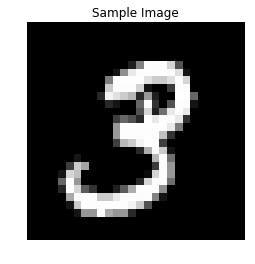

In [38]:
#Plot sample image at index 1(index 0 looks too sketchy) of the training set
#Reshape 28x28 and use greyscale
sample = mnist.train.images[1].reshape(28,28)
pl.title('Sample Image')
pl.axis('off')
pl.imshow(sample, cmap = 'gray')
pl.show()

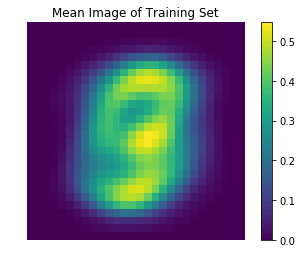

In [39]:
#Reshaping all the training images 28x28
#in order to plot mean image
train_images = mnist.train.images
train_images = np.reshape(train_images,[train_images.shape[0],28,28])
mean = np.mean(train_images, axis = 0)

#Plot the mean
pl.title('Mean Image of Training Set')
pl.imshow(mean)
pl.colorbar()
pl.axis('off')
pl.show()

#Mean image provides a visual representation of where the digits
#are drawn in the images

**Step 3:** Build the model.

In [40]:
#Placeholders
#None means we can input any number of images
#Input has 784 dimensional vector (28x28)
#Output has to be 1 out of 10 outcomes, 0-9 digit
x = tf.placeholder(tf.float32,shape=[None, 784])
y_ = tf.placeholder(tf.float32,shape=[None, 10])

#Input Layer: -1 meaning no fixed batch dimension
#28x28 reshape and 1 for greyscale
x_input = tf.reshape(x,[-1,28,28,1], name='input')

#Layer 1: 32 output filters, filter size 5x5,
#stride of 2, same padding and RELU activation
layer1 = tflearn.layers.conv.conv_2d(x_input, nb_filter=32, filter_size=5, strides=[1,1,1,1],padding='same', activation='relu', regularizer="L2", name='layer1')

#Pooling layer 1: Preforms max pooling 2x2 filter
#and stride of 2 on layer 1
out_layer1 = tflearn.layers.conv.max_pool_2d(layer1, 2)

#Layer 2: 32 output filters, filter size 5x5,
#stride of 2, same padding and RELU activation
layer2 = tflearn.layers.conv.conv_2d(out_layer1, nb_filter=32, filter_size=5, strides=[1,1,1,1],padding='same', activation='relu',  regularizer="L2", name='layer2')

#Pooling layer 2: Preforms max pooling 2x2 filter
#and stride of 2 on layer 2
out_layer2 = tflearn.layers.conv.max_pool_2d(layer2, 2)

#Fully connected layer takes in layer 2 after pooling and has 1024 neurons
fcl = tflearn.layers.core.fully_connected(out_layer2, 1024, activation='relu')

#Dropout - simple way to prevent NN overfitting
fcl_dropout = tflearn.layers.core.dropout(fcl, 0.8)

#Predicted output using softmax
y = tflearn.layers.core.fully_connected(fcl_dropout, 10, activation='softmax', name='output')

#Loss function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

#Optimiser
#train_step = tf.train.AdamOptimizer(0.01).minimize(cross_entropy)
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

#Accuracy of the model
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [41]:
#Print layer shapes
print("Shape of input layer: {}".format(x_input.get_shape().as_list()))
print("Shape of first convolutional layer: {}".format(out_layer1.get_shape().as_list()))
print("Shape of second convolutional layer: {}".format(out_layer2.get_shape().as_list()))
print("Shape of fully connected layer: {}".format(fcl.get_shape().as_list()))
print("Shape of output layer: {}".format(y.get_shape().as_list()))

Shape of input layer: [None, 28, 28, 1]
Shape of first convolutional layer: [None, 14, 14, 32]
Shape of second convolutional layer: [None, 7, 7, 32]
Shape of fully connected layer: [None, 1024]
Shape of output layer: [None, 10]


**Step 4:** Train & test the model.

In [42]:
#Create the session
sess = tf.InteractiveSession()
#Initialize the variables
tf.global_variables_initializer().run()

In [43]:
#Short training & testing session for now
#Training the model
for _ in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
#Determine the accuracy using the testing set
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9738


# References
https://www.tensorflow.org/get_started/mnist/beginners  
https://www.tensorflow.org/get_started/mnist/pros   
https://www.quora.com/What-is-one-hot-encoding-and-when-is-it-used-in-data-science  
https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.mean.html  
https://matplotlib.org/api/colorbar_api.html  
https://www.khanacademy.org/math/differential-equations/laplace-transform/convolution-integral/v/introduction-to-the-convolution  
http://cs231n.github.io/convolutional-networks/  
https://www.tensorflow.org/tutorials/layers  
http://tflearn.org/examples/  
http://tflearn.org/layers/conv/  
http://tflearn.org/activations/